In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
!pip install gradio pandas scikit-learn
import gradio as gr
import joblib

In [ ]:
data = pd.read_csv('dataset.csv')

In [ ]:
X = data.iloc[:, :-1]
y = data['prognosis']

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4962 entries, 0 to 4961
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


In [ ]:
print("\nDataset Shape:", data.shape)
print("\nFirst 5 Rows:\n", data.head())


Dataset Shape: (4962, 133)

First 5 Rows:
    itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          0                     0                    1          1   
2        0          0                     0                    0          0   
3        1          0                     0                    0          0   
4        1          1                     0                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  \
0       0           0             0        0                 0  ...   
1       1           0             0        0                 0  ...   
2       0           0             1        1                 1  ...   
3       0           0             0        0                 0  ...   
4       0           0             1        0                 0  ...   

   blackheads  scurring  skin_peeling  silver_like_dus

In [ ]:
missing_values = data.isnull().sum()
print("\nMissing Values per Column:\n", missing_values)


Missing Values per Column:
 itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64


In [ ]:
print("\nSummary Statistics:\n", data.describe())


Summary Statistics:
            itching    skin_rash  nodal_skin_eruptions  continuous_sneezing  \
count  4962.000000  4962.000000           4962.000000          4962.000000   
mean      0.138049     0.160016              0.021967             0.045143   
std       0.344986     0.366658              0.146590             0.207639   
min       0.000000     0.000000              0.000000             0.000000   
25%       0.000000     0.000000              0.000000             0.000000   
50%       0.000000     0.000000              0.000000             0.000000   
75%       0.000000     0.000000              0.000000             0.000000   
max       1.000000     1.000000              1.000000             1.000000   

         shivering       chills   joint_pain  stomach_pain      acidity  \
count  4962.000000  4962.000000  4962.000000   4962.000000  4962.000000   
mean      0.021967     0.162233     0.139057      0.045143     0.045143   
std       0.146590     0.368702     0.346041      

In [ ]:
target_column = 'prognosis'
print("\nTarget Class Distribution:\n", data[target_column].value_counts())


Target Class Distribution:
 prognosis
Fungal infection                           122
Hepatitis C                                121
Hepatitis E                                121
Alcoholic hepatitis                        121
Tuberculosis                               121
Common Cold                                121
Pneumonia                                  121
Dimorphic hemmorhoids(piles)               121
Heart attack                               121
Varicose veins                             121
Hypothyroidism                             121
Hyperthyroidism                            121
Hypoglycemia                               121
Osteoarthristis                            121
Arthritis                                  121
(vertigo) Paroymsal  Positional Vertigo    121
Acne                                       121
Urinary tract infection                    121
Psoriasis                                  121
Hepatitis D                                121
Hepatitis B          

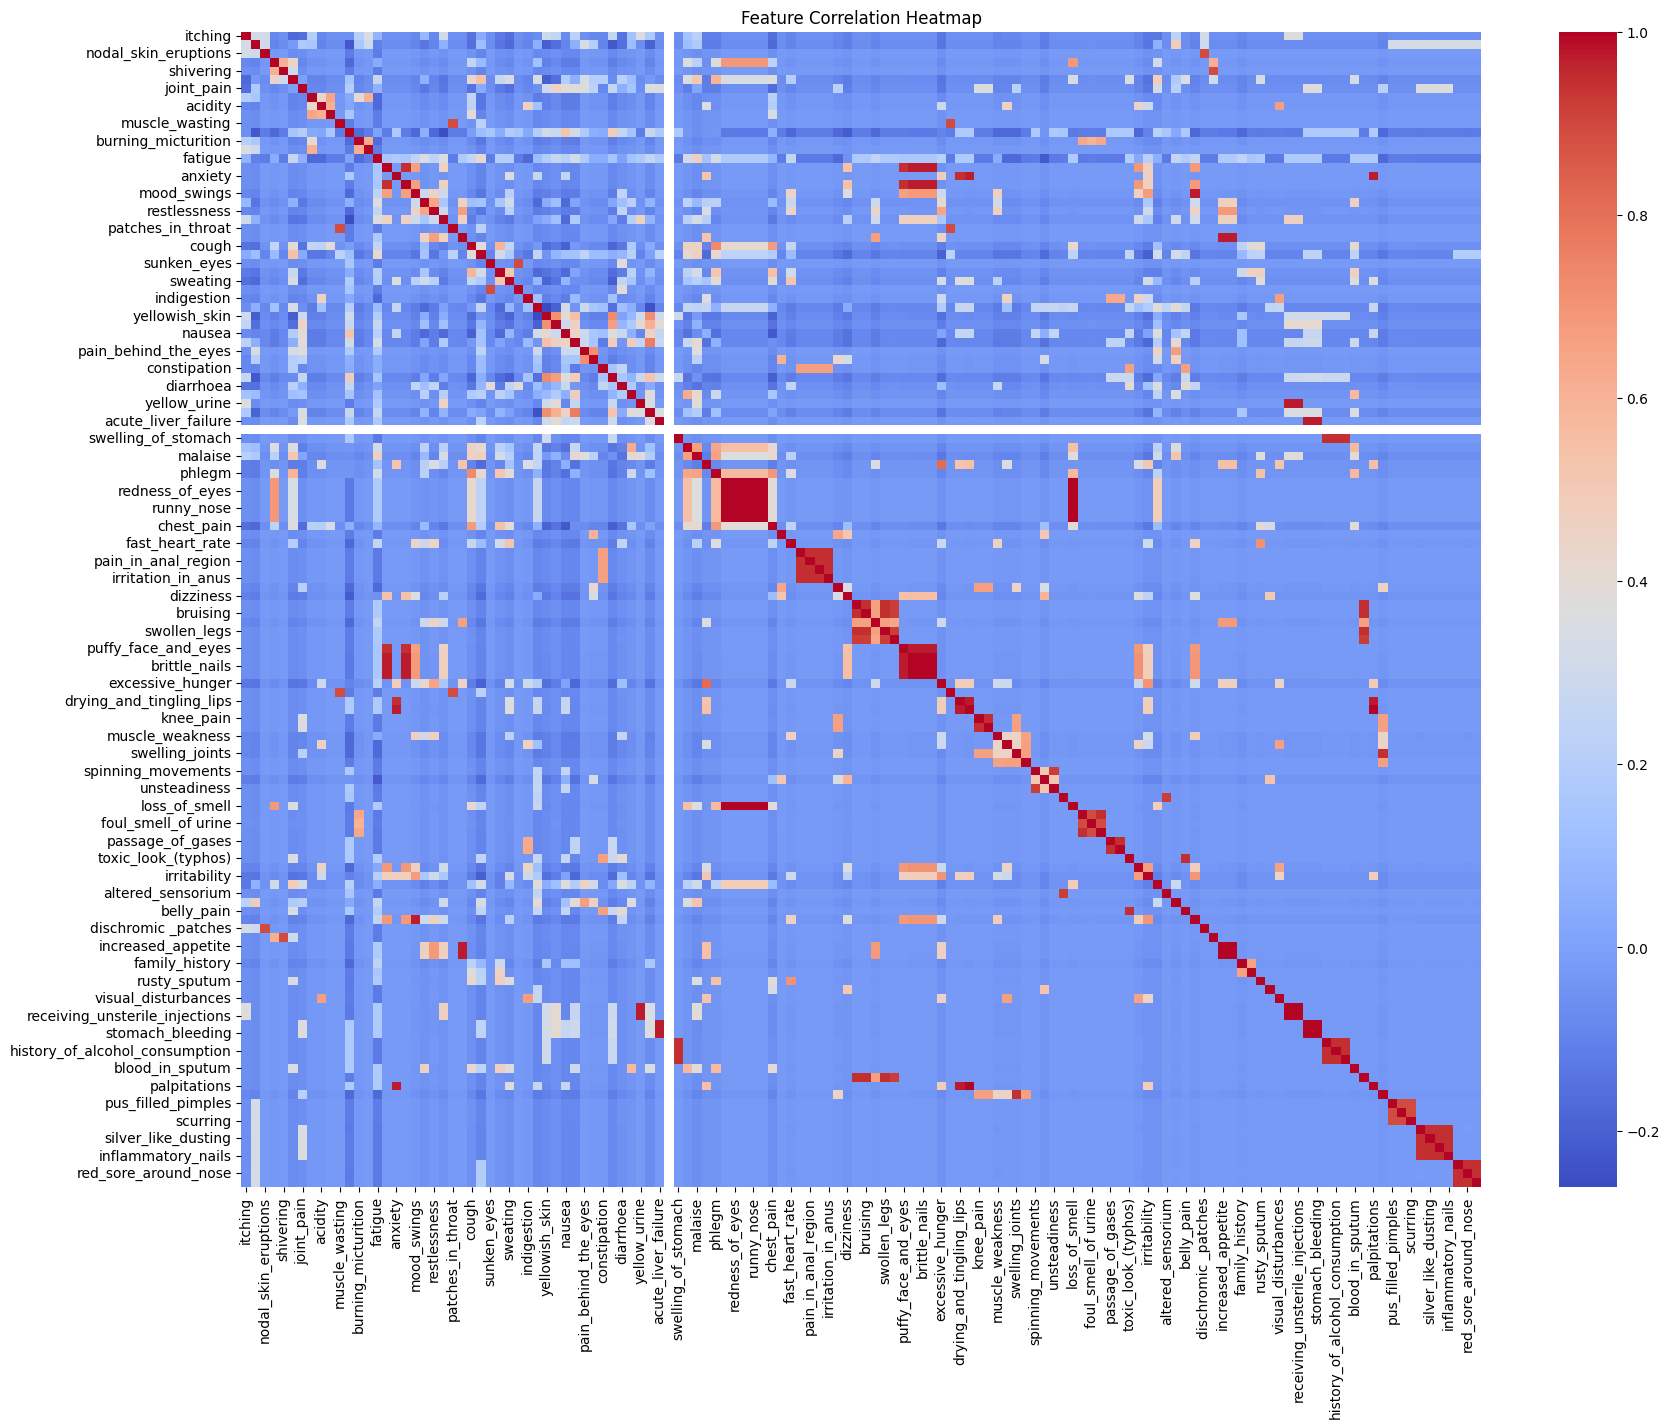

In [ ]:
numerical_data = data.select_dtypes(include=np.number)

corr_matrix = data.corr(numeric_only=True)
plt.figure(figsize=(20, 15))
sns.heatmap(numerical_data.corr(), cmap='coolwarm', annot=False)
plt.title('Feature Correlation Heatmap')
plt.show()


In [ ]:
def chi_square_test(df, target_col):
    """
    Perform Chi-Square test for all features against the target variable.
    """
    chi2_results = {}
    for col in df.columns:
        if col != target_col:
            contingency_table = pd.crosstab(df[col], df[target_col])
            chi2, p, dof, expected = chi2_contingency(contingency_table)
            chi2_results[col] = {'Chi2 Statistic': chi2, 'P-Value': p}

    chi2_results_df = pd.DataFrame(chi2_results).T
    return chi2_results_df

chi2_results_df = chi_square_test(data, target_column)

print("\nChi-Square Test Results:\n", chi2_results_df.sort_values(by='P-Value'))



Chi-Square Test Results:
                      Chi2 Statistic  P-Value
itching                 4631.455079      0.0
irritability            4896.493599      0.0
depression              4836.115714      0.0
toxic_look_(typhos)     4710.112637      0.0
internal_itching        4710.112637      0.0
...                             ...      ...
loss_of_appetite        4710.941157      0.0
nausea                  4674.794249      0.0
malaise                 4822.148299      0.0
yellow_crust_ooze       4710.112637      0.0
fluid_overload             0.000000      1.0

[132 rows x 2 columns]


In [ ]:
significant_features = chi2_results_df[chi2_results_df['P-Value'] < 0.05].index
print("\nSignificant Features (P-value < 0.05):\n", significant_features)


Significant Features (P-value < 0.05):
 Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'pus_filled_pimples', 'blackheads', 'scurring', 'skin_peeling',
       'silver_like_dusting', 'small_dents_in_nails', 'inflammatory_nails',
       'blister', 'red_sore_around_nose', 'yellow_crust_ooze'],
      dtype='object', length=131)


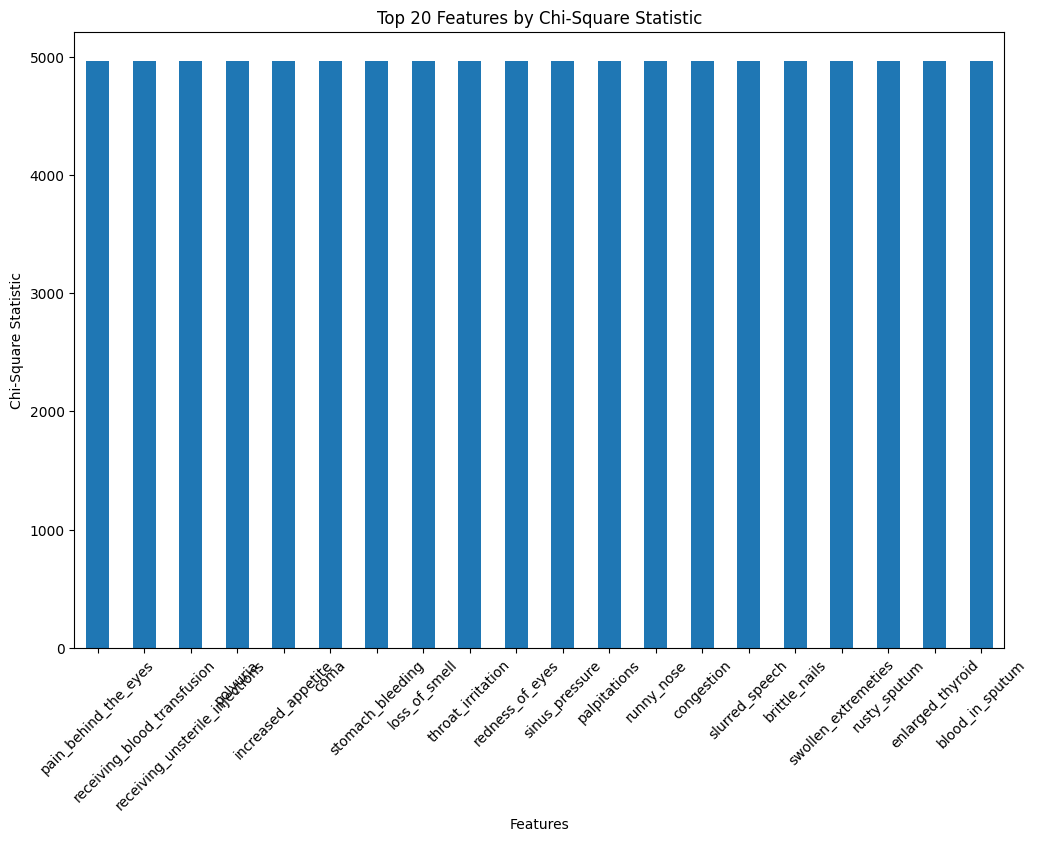

In [ ]:
plt.figure(figsize=(12, 8))
chi2_results_df.sort_values(by='Chi2 Statistic', ascending=False)['Chi2 Statistic'].head(20).plot(kind='bar')
plt.title('Top 20 Features by Chi-Square Statistic')
plt.ylabel('Chi-Square Statistic')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.show()

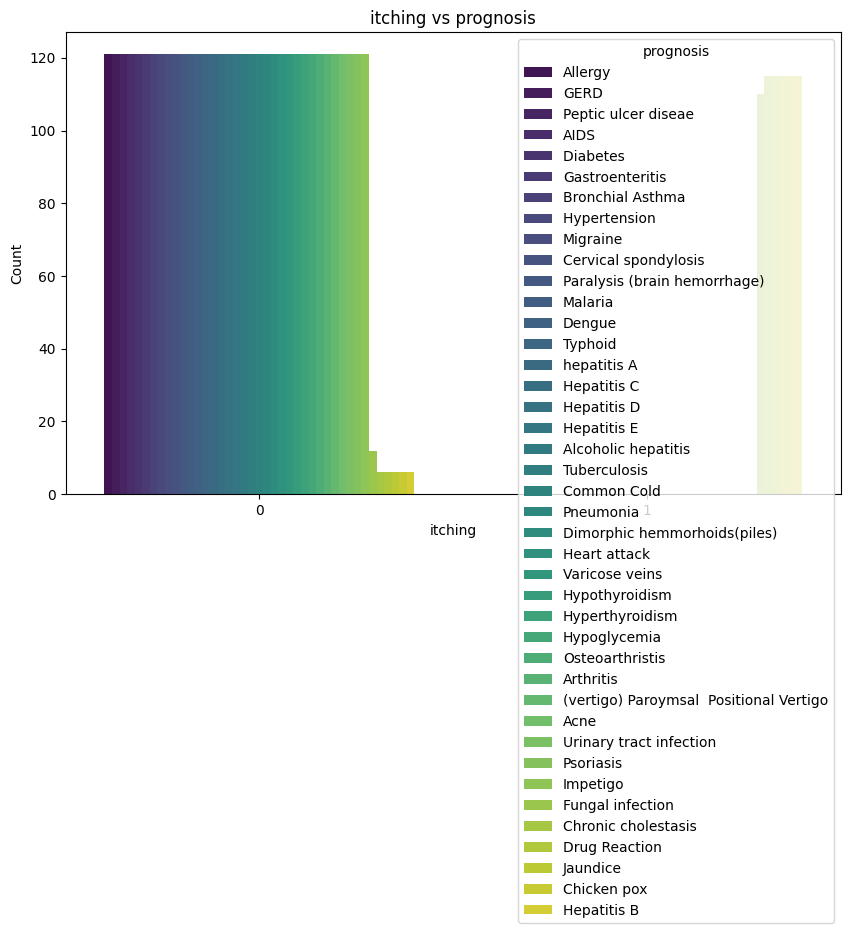

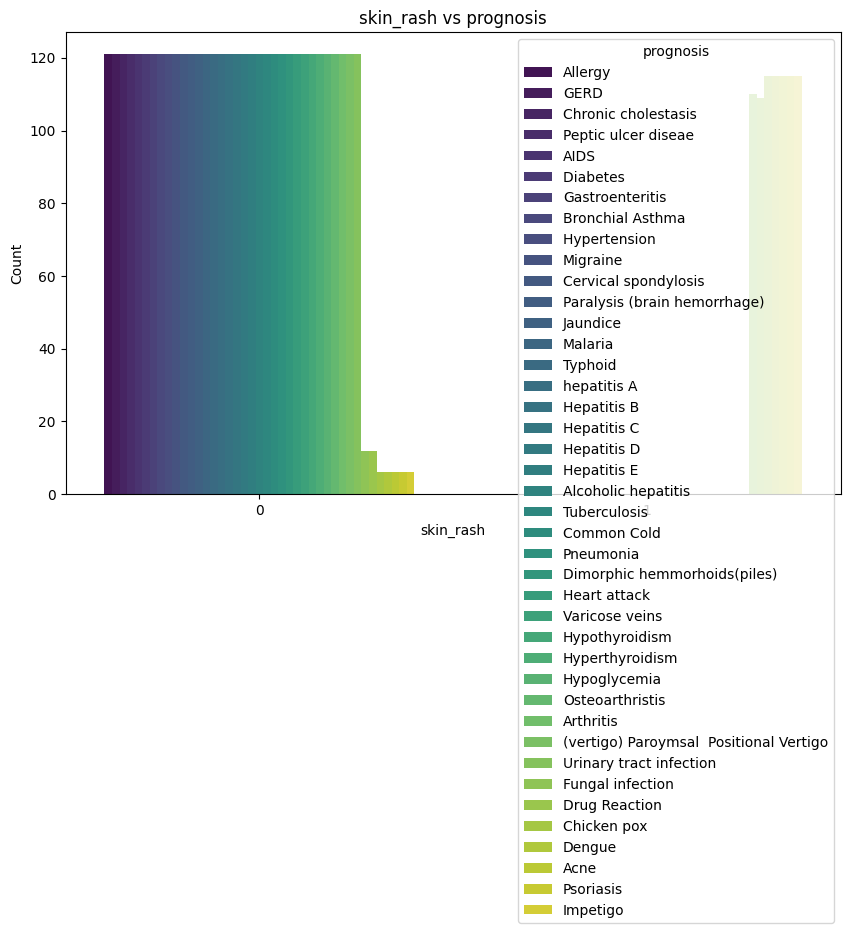

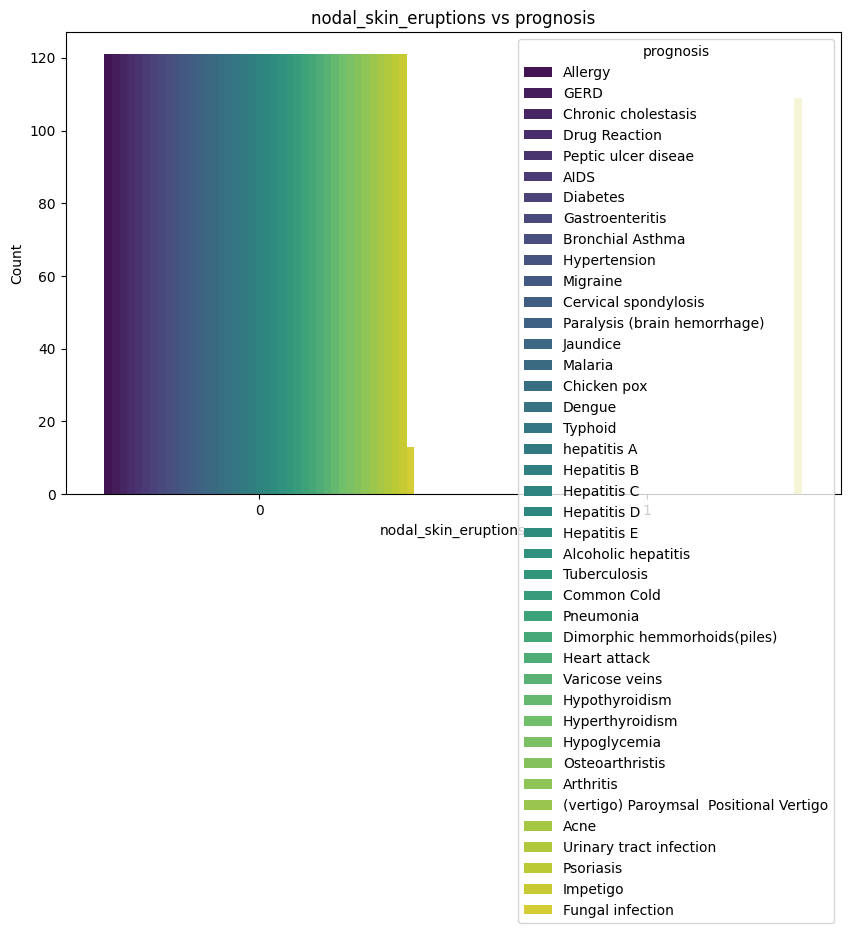

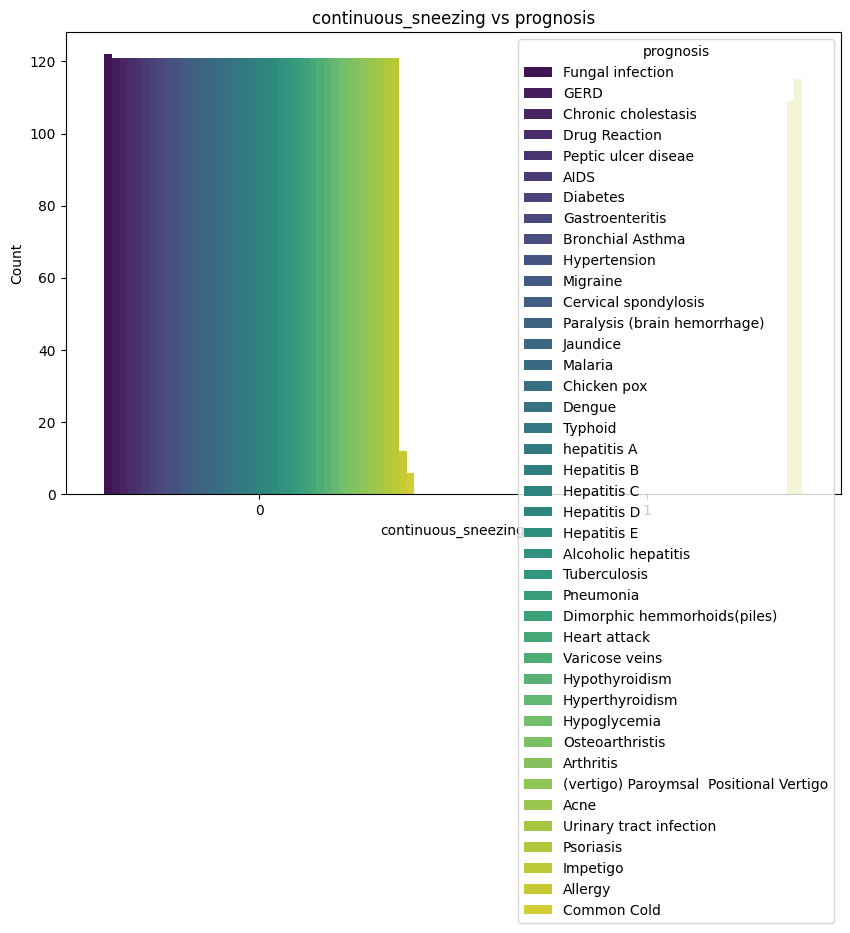

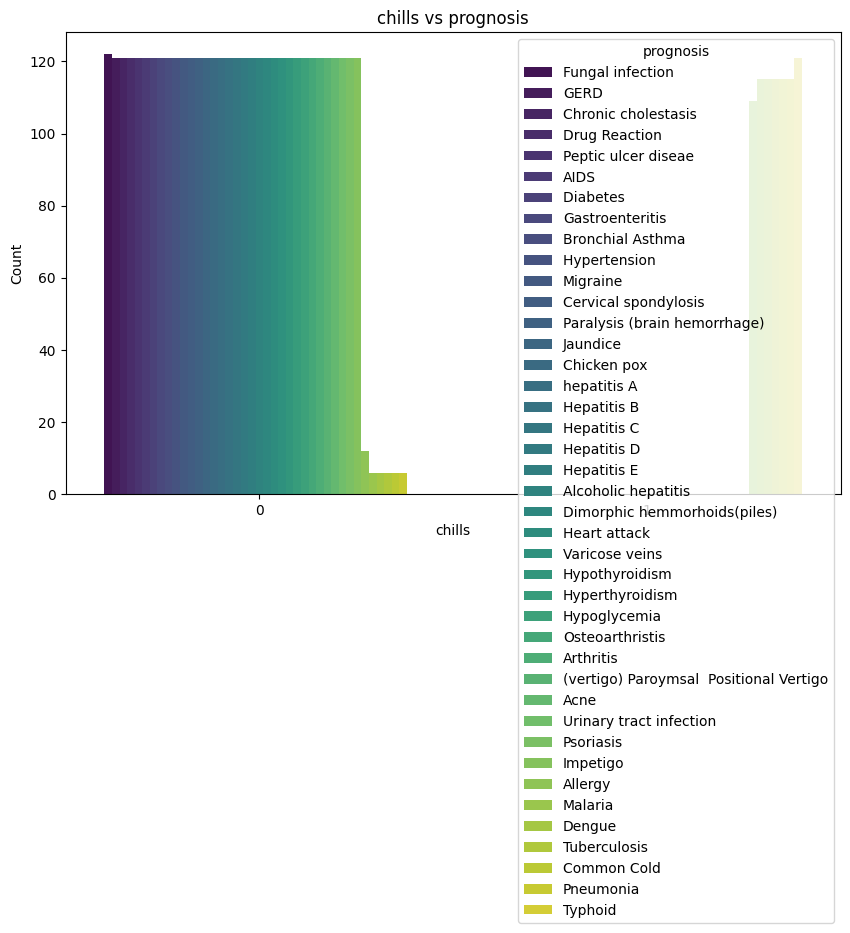

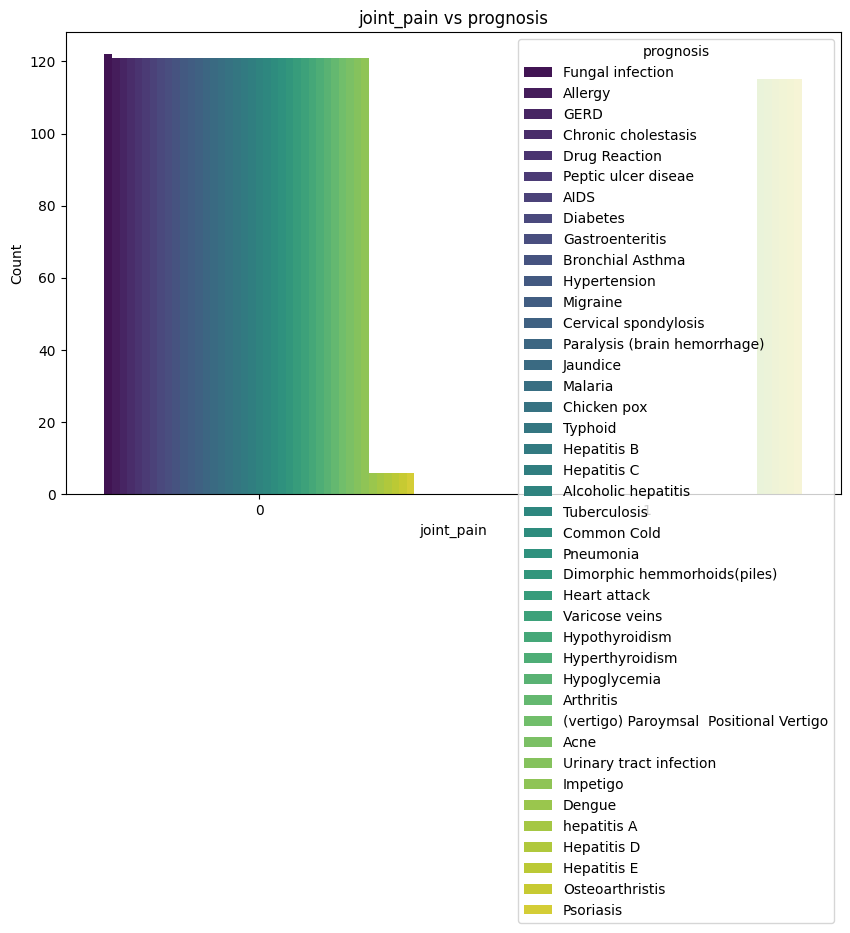

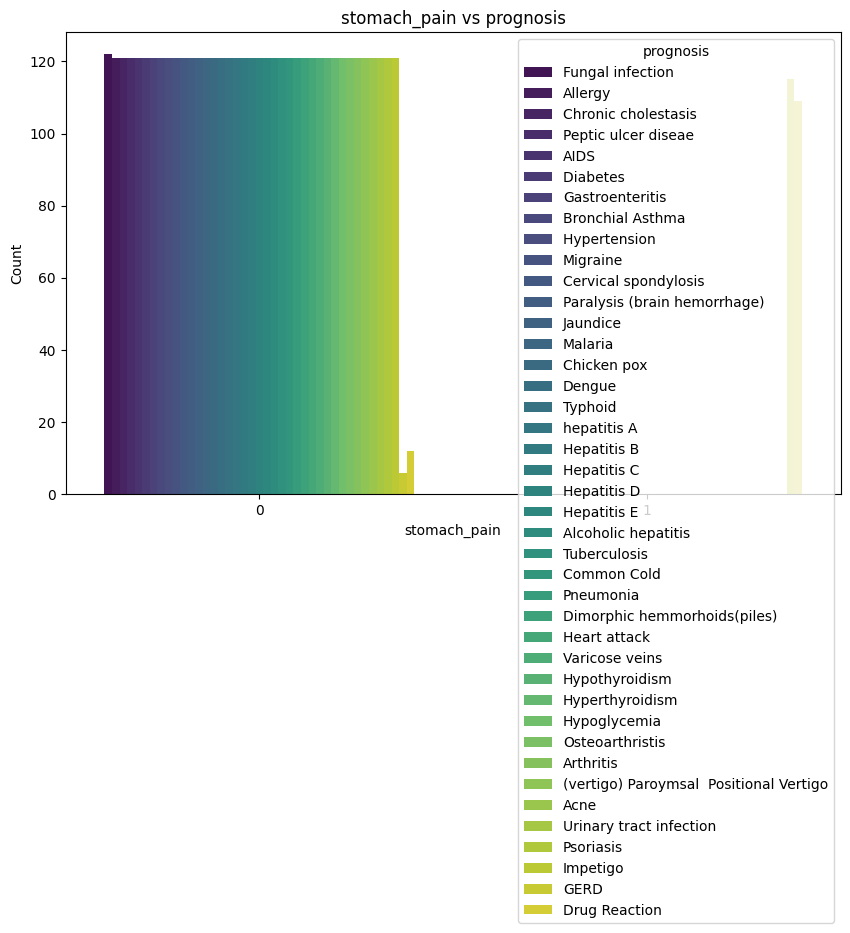

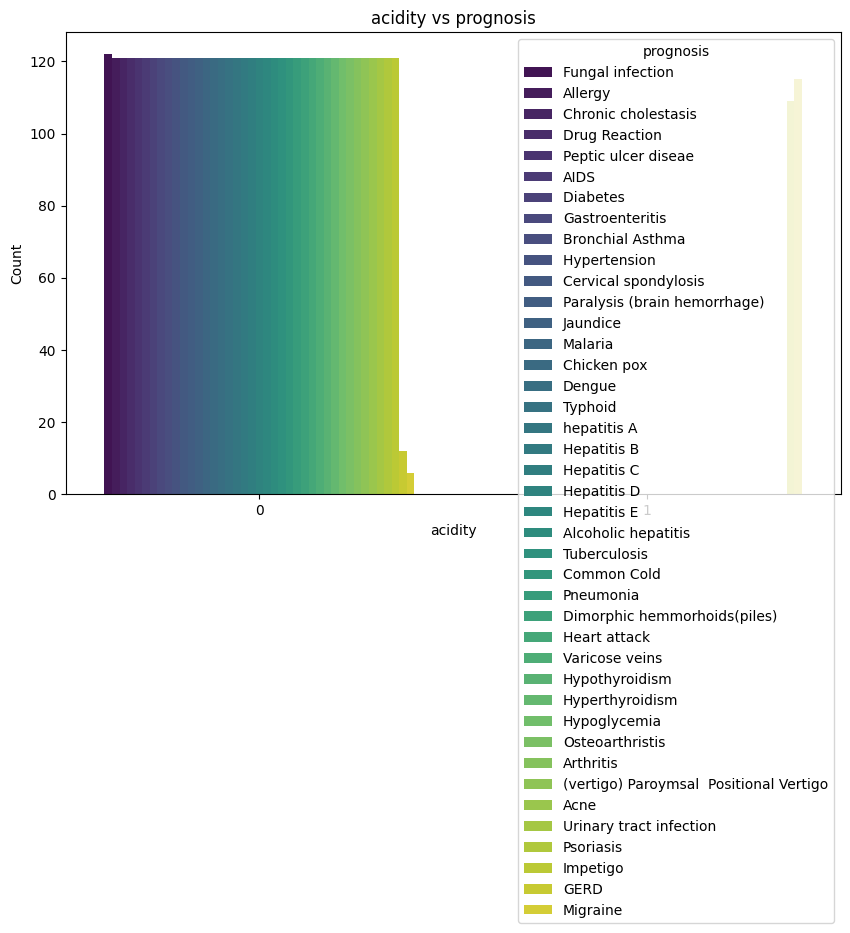

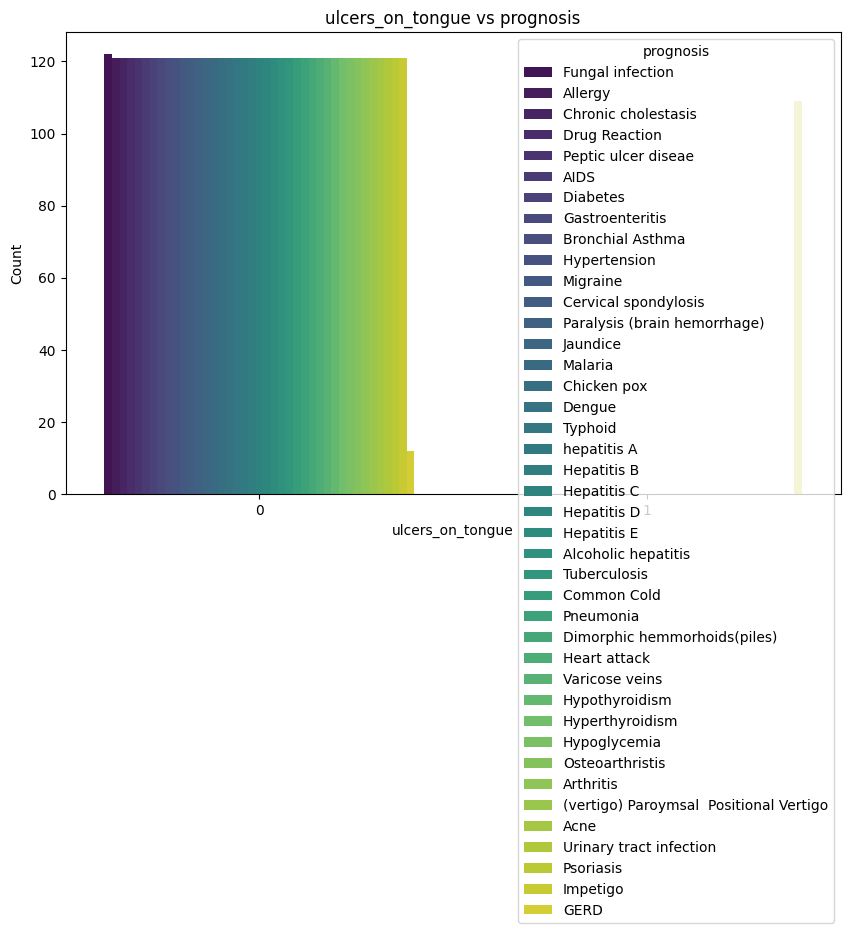

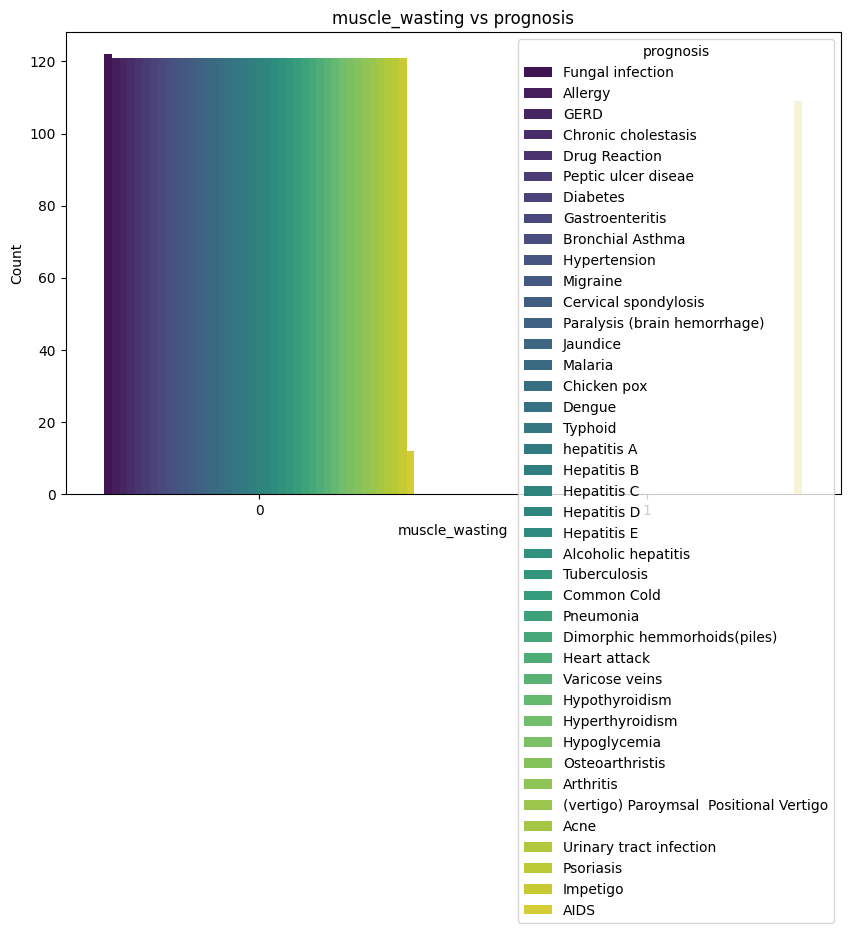

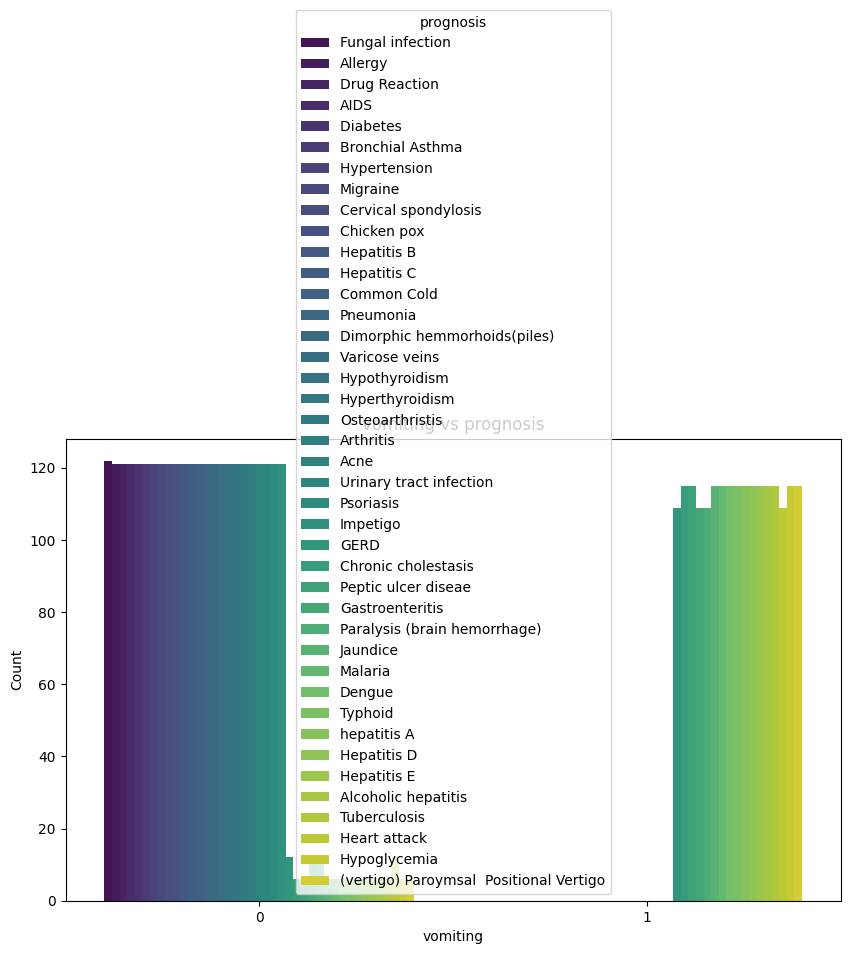

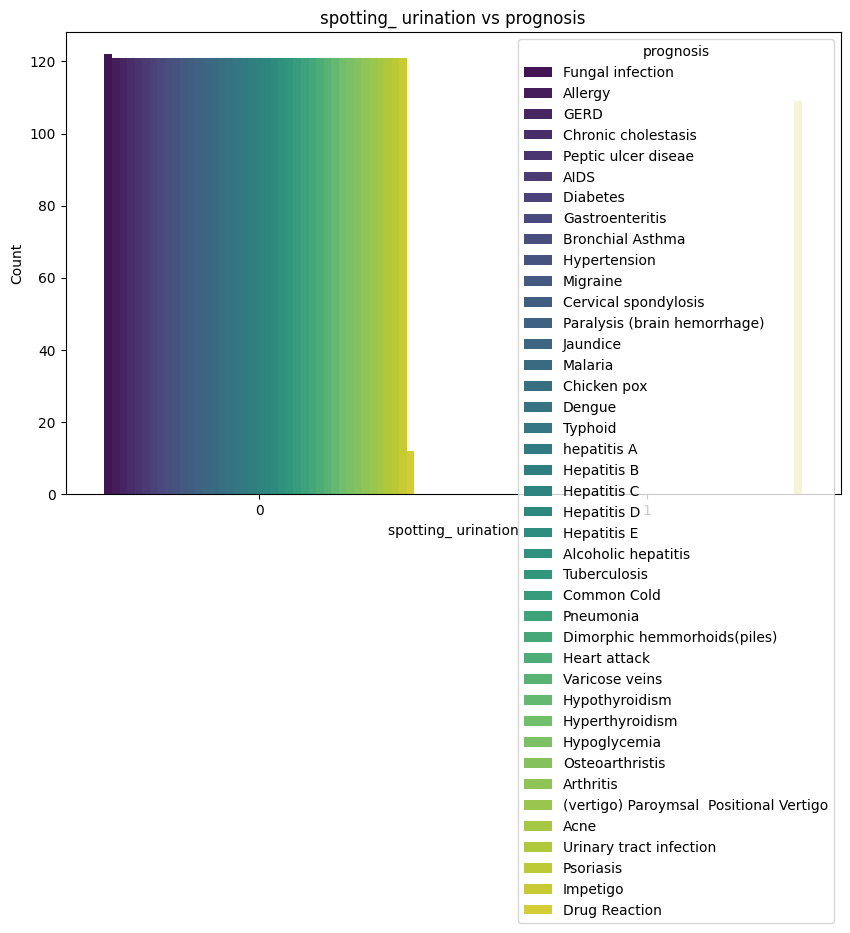

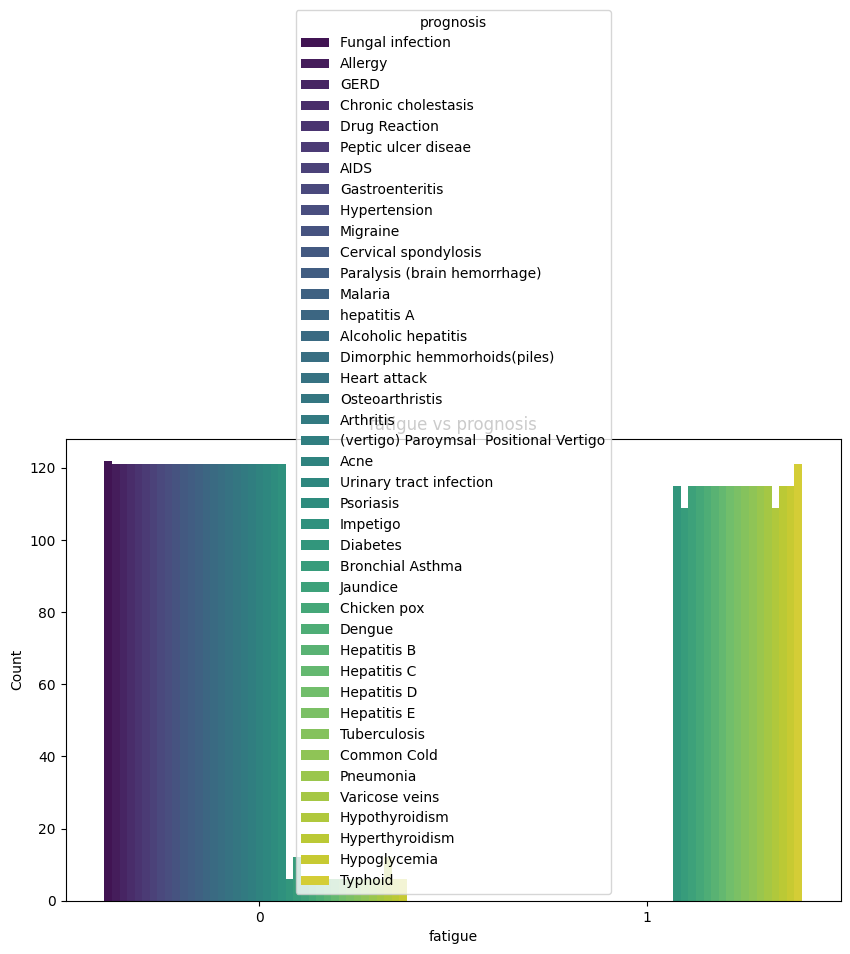

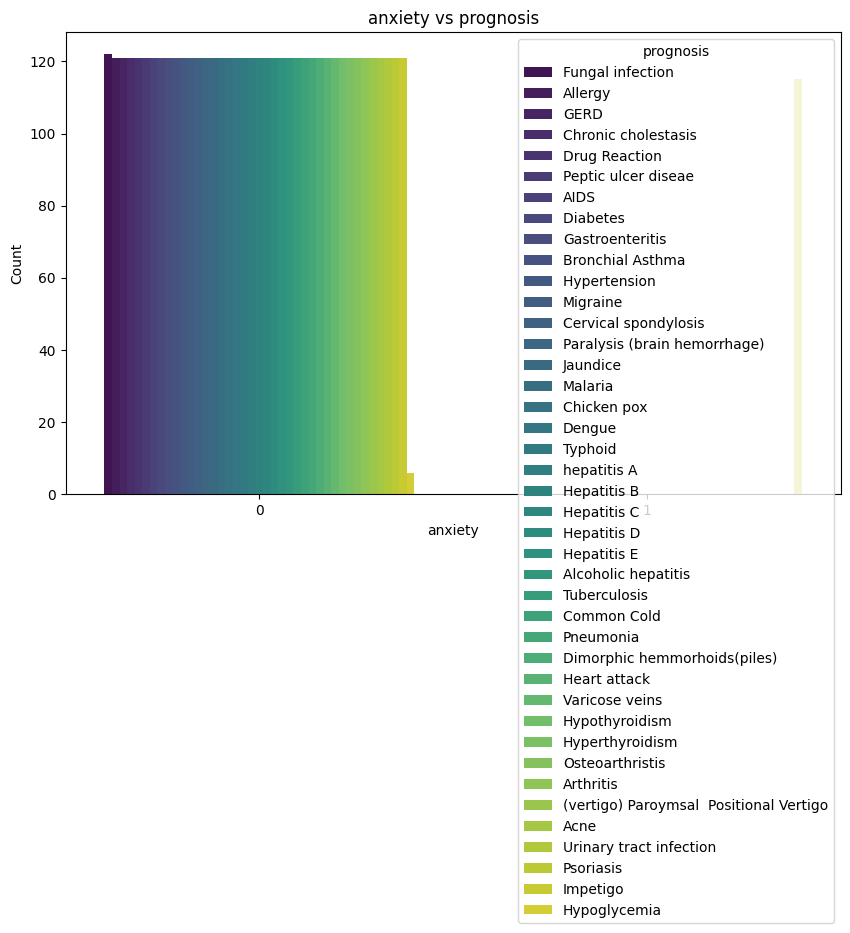

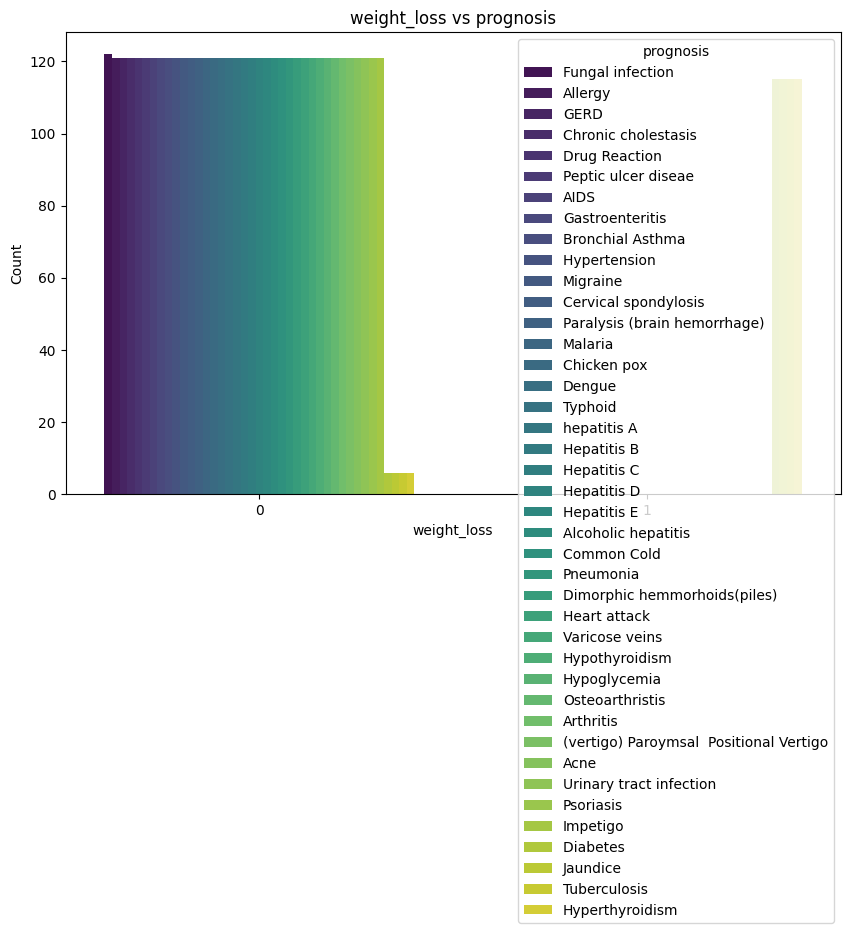

In [ ]:
for feature in significant_features[:20]:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x=feature, hue=target_column, palette='viridis')
    plt.title(f'{feature} vs {target_column}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()


In [ ]:
correlation_threshold = 0.1

target_encoded = data[target_column].astype('category').cat.codes

corr_with_target = data.corrwith(target_encoded, numeric_only=True)
correlated_features = corr_with_target.abs()

selected_features_by_corr = correlated_features[correlated_features > correlation_threshold].index.tolist()
selected_features_by_corr = [feature for feature in selected_features_by_corr if feature != target_column]

print(f"\nFeatures selected by correlation threshold ({correlation_threshold}):")
print(selected_features_by_corr)


Features selected by correlation threshold (0.1):
['itching', 'skin_rash', 'continuous_sneezing', 'shivering', 'chills', 'joint_pain', 'muscle_wasting', 'vomiting', 'burning_micturition', 'fatigue', 'weight_loss', 'lethargy', 'patches_in_throat', 'irregular_sugar_level', 'sweating', 'indigestion', 'dark_urine', 'pain_behind_the_eyes', 'back_pain', 'abdominal_pain', 'diarrhoea', 'mild_fever', 'yellowing_of_eyes', 'swelling_of_stomach', 'phlegm', 'throat_irritation', 'redness_of_eyes', 'sinus_pressure', 'runny_nose', 'congestion', 'chest_pain', 'weakness_in_limbs', 'fast_heart_rate', 'cramps', 'bruising', 'obesity', 'swollen_legs', 'swollen_blood_vessels', 'extra_marital_contacts', 'knee_pain', 'hip_joint_pain', 'movement_stiffness', 'spinning_movements', 'loss_of_balance', 'unsteadiness', 'weakness_of_one_body_side', 'loss_of_smell', 'bladder_discomfort', 'foul_smell_of urine', 'continuous_feel_of_urine', 'passage_of_gases', 'internal_itching', 'toxic_look_(typhos)', 'depression', 'irr

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [ ]:
p_value_threshold = 0.05
selected_features_by_chi2 = chi2_results_df[chi2_results_df['P-Value'] < p_value_threshold].index.tolist()

print(f"\nFeatures selected by Chi-Square test (P-value < {p_value_threshold}):")
print(selected_features_by_chi2)


Features selected by Chi-Square test (P-value < 0.05):
['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing', 'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity', 'ulcers_on_tongue', 'muscle_wasting', 'vomiting', 'burning_micturition', 'spotting_ urination', 'fatigue', 'weight_gain', 'anxiety', 'cold_hands_and_feets', 'mood_swings', 'weight_loss', 'restlessness', 'lethargy', 'patches_in_throat', 'irregular_sugar_level', 'cough', 'high_fever', 'sunken_eyes', 'breathlessness', 'sweating', 'dehydration', 'indigestion', 'headache', 'yellowish_skin', 'dark_urine', 'nausea', 'loss_of_appetite', 'pain_behind_the_eyes', 'back_pain', 'constipation', 'abdominal_pain', 'diarrhoea', 'mild_fever', 'yellow_urine', 'yellowing_of_eyes', 'acute_liver_failure', 'swelling_of_stomach', 'swelled_lymph_nodes', 'malaise', 'blurred_and_distorted_vision', 'phlegm', 'throat_irritation', 'redness_of_eyes', 'sinus_pressure', 'runny_nose', 'congestion', 'chest_pain', 'weakness_in_limbs

In [ ]:

final_selected_features = set(selected_features_by_corr) & set(selected_features_by_chi2)
print(f"\nFinal selected features (intersection of correlation and Chi-Square):")
print(final_selected_features)

filtered_data = data[list(final_selected_features) + [target_column]]
print(f"\nFiltered dataset shape: {filtered_data.shape}")

filtered_data.to_csv('filtered_dataset.csv', index=False)
print("\nFiltered dataset saved as 'filtered_dataset.csv'")


Final selected features (intersection of correlation and Chi-Square):
{'irregular_sugar_level', 'watering_from_eyes', 'vomiting', 'scurring', 'distention_of_abdomen', 'phlegm', 'dark_urine', 'fluid_overload.1', 'patches_in_throat', 'runny_nose', 'altered_sensorium', 'movement_stiffness', 'polyuria', 'bladder_discomfort', 'sinus_pressure', 'back_pain', 'continuous_sneezing', 'weakness_of_one_body_side', 'blood_in_sputum', 'continuous_feel_of_urine', 'swollen_legs', 'burning_micturition', 'red_spots_over_body', 'yellowing_of_eyes', 'lethargy', 'internal_itching', 'loss_of_balance', 'chest_pain', 'skin_peeling', 'unsteadiness', 'obesity', 'skin_rash', 'extra_marital_contacts', 'inflammatory_nails', 'depression', 'weakness_in_limbs', 'mucoid_sputum', 'mild_fever', 'belly_pain', 'chills', 'pus_filled_pimples', 'bruising', 'loss_of_smell', 'congestion', 'foul_smell_of urine', 'diarrhoea', 'spinning_movements', 'joint_pain', 'knee_pain', 'swollen_blood_vessels', 'shivering', 'pain_behind_the

In [ ]:
filtered_data = pd.read_csv('filtered_dataset.csv')

In [ ]:
target_column = 'prognosis'
X = filtered_data.drop(columns=[target_column])
y = filtered_data[target_column]

In [ ]:
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
logreg_model = LogisticRegression(max_iter=1000, random_state=42)
logreg_model.fit(X_train, y_train)

y_pred_logreg = logreg_model.predict(X_test)

print("\nLogistic Regression Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_logreg):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_logreg))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_logreg))


Logistic Regression Model Evaluation:
Accuracy: 0.9607

Confusion Matrix:
[[21  0  0 ...  0  0  0]
 [ 0 25  0 ...  0  0  0]
 [ 0  0 24 ...  0  0  0]
 ...
 [ 0  0  0 ... 27  0  0]
 [ 0  0  0 ...  0 17  0]
 [ 0  0  0 ...  0  0 29]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        25
           2       1.00      1.00      1.00        24
           3       1.00      1.00      1.00        25
           4       1.00      1.00      1.00        25
           5       1.00      0.95      0.98        21
           6       1.00      1.00      1.00        21
           7       1.00      1.00      1.00        16
           8       1.00      1.00      1.00        20
           9       1.00      1.00      1.00        22
          10       1.00      1.00      1.00        29
          11       1.00      1.00      1.00        33
          12       1.00      1.00      1.0

In [ ]:
cv = StratifiedKFold(n_splits=20, shuffle=True, random_state=42)

scores = cross_val_score(logreg_model, X, y, cv=cv, scoring='accuracy')

print("Cross-Validation Scores:", scores)
print("Average Accuracy:", scores.mean())
sd_scores = np.std(scores)
print(f"Standard Deviation of Cross-Validation Scores: {sd_scores:.4f}")

Cross-Validation Scores: [0.96787149 0.96385542 0.97580645 0.96370968 0.96370968 0.96370968
 0.96774194 0.96370968 0.96370968 0.95564516 0.97177419 0.9516129
 0.97177419 0.96370968 0.94354839 0.9516129  0.96370968 0.97580645
 0.95967742 0.96774194]
Average Accuracy: 0.9635218292524941
Standard Deviation of Cross-Validation Scores: 0.0079


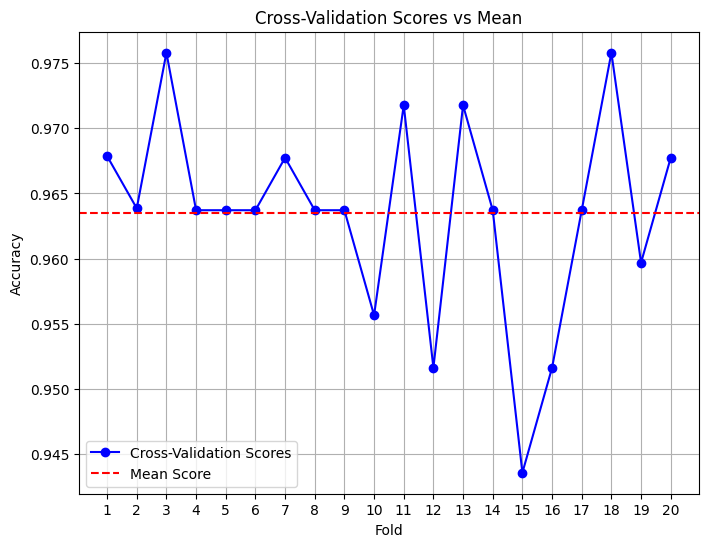

In [ ]:
mean_score = scores.mean()

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(scores) + 1), scores, marker='o', linestyle='-', color='b', label='Cross-Validation Scores')
plt.axhline(y=mean_score, color='r', linestyle='--', label='Mean Score')

plt.title('Cross-Validation Scores vs Mean')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.xticks(range(1, len(scores) + 1))
plt.legend()
plt.grid(True)

plt.show()

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=8)

knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of KNN model: {accuracy}")

Accuracy of KNN model: 0.9607250755287009


In [ ]:
cv = StratifiedKFold(n_splits=20, shuffle=True, random_state=42)

scores = cross_val_score(knn_model, X, y, cv=cv, scoring='accuracy')

print("Cross-Validation Scores:", scores)
print("Average Accuracy:", scores.mean())
sd_scores = np.std(scores)
print(f"Standard Deviation of Cross-Validation Scores: {sd_scores:.4f}")

Cross-Validation Scores: [0.96787149 0.95983936 0.97580645 0.96774194 0.96774194 0.96774194
 0.97177419 0.95967742 0.96370968 0.9516129  0.97580645 0.93951613
 0.96370968 0.95967742 0.93145161 0.94758065 0.96370968 0.96774194
 0.95967742 0.9516129 ]
Average Accuracy: 0.9607000582977072
Standard Deviation of Cross-Validation Scores: 0.0112


In [ ]:
mean_score = scores.mean()

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(scores) + 1), scores, marker='o', linestyle='-', color='b', label='Cross-Validation Scores')
plt.axhline(y=mean_score, color='r', linestyle='--', label='Mean Score')

plt.title('Cross-Validation Scores vs Mean')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.xticks(range(1, len(scores) + 1))
plt.legend()
plt.grid(True)

plt.show()

In [ ]:
nb_model = GaussianNB()

nb_model.fit(X_train, y_train)

y_pred = nb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Naive Bayes model: {accuracy}")

Accuracy of Naive Bayes model: 0.9536757301107754


In [ ]:
cv = StratifiedKFold(n_splits=20, shuffle=True, random_state=42)

scores = cross_val_score(nb_model, X, y, cv=cv, scoring='accuracy')

print("Cross-Validation Scores:", scores)
print("Average Accuracy:", scores.mean())
sd_scores = np.std(scores)
print(f"Standard Deviation of Cross-Validation Scores: {sd_scores:.4f}")

Cross-Validation Scores: [0.94779116 0.93975904 0.95564516 0.9516129  0.94758065 0.93951613
 0.94758065 0.95967742 0.94354839 0.93548387 0.94758065 0.93951613
 0.9516129  0.93951613 0.93548387 0.93145161 0.94354839 0.95564516
 0.93548387 0.94758065]
Average Accuracy: 0.9447807358466124
Standard Deviation of Cross-Validation Scores: 0.0076


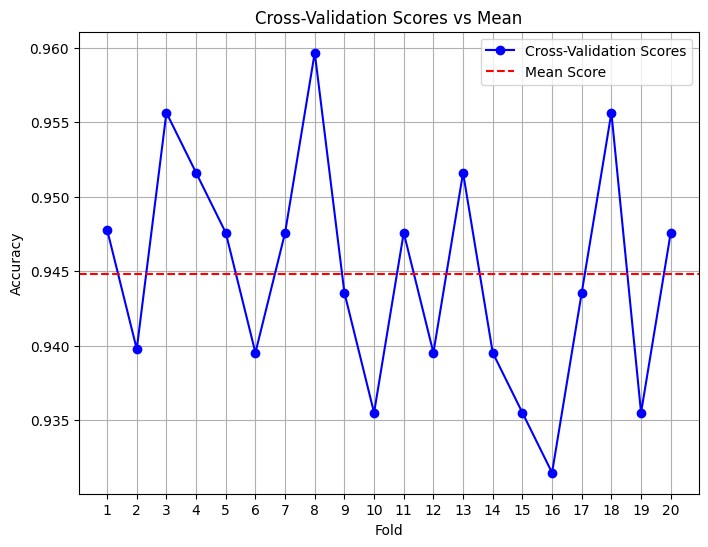

In [ ]:
mean_score = scores.mean()

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(scores) + 1), scores, marker='o', linestyle='-', color='b', label='Cross-Validation Scores')
plt.axhline(y=mean_score, color='r', linestyle='--', label='Mean Score')

plt.title('Cross-Validation Scores vs Mean')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.xticks(range(1, len(scores) + 1))
plt.legend()
plt.grid(True)

plt.show()

In [ ]:
linear_svm = SVC(kernel='linear')  # Specify 'linear' kernel
linear_svm.fit(X_train, y_train)
y_pred_linear = linear_svm.predict(X_test)
accuracy_linear = accuracy_score(y_test, y_pred_linear)
print(f"Accuracy of Linear SVM: {accuracy_linear}")


Accuracy of Linear SVM: 0.9697885196374623


In [ ]:
cv = StratifiedKFold(n_splits=20, shuffle=True, random_state=42)

scores = cross_val_score(linear_svm, X, y, cv=cv, scoring='accuracy')

print("Cross-Validation Scores:", scores)
print("Average Accuracy:", scores.mean())
sd_scores = np.std(scores)
print(f"Standard Deviation of Cross-Validation Scores: {sd_scores:.4f}")

Cross-Validation Scores: [0.96787149 0.96385542 0.97580645 0.96370968 0.96774194 0.96370968
 0.96774194 0.96370968 0.96370968 0.95564516 0.97177419 0.9516129
 0.97177419 0.96370968 0.94354839 0.9516129  0.96370968 0.97580645
 0.95967742 0.96774194]
Average Accuracy: 0.9637234421557199
Standard Deviation of Cross-Validation Scores: 0.0080


In [ ]:
mean_score = scores.mean()

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(scores) + 1), scores, marker='o', linestyle='-', color='b', label='Cross-Validation Scores')
plt.axhline(y=mean_score, color='r', linestyle='--', label='Mean Score')

plt.title('Cross-Validation Scores vs Mean')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.xticks(range(1, len(scores) + 1))
plt.legend()
plt.grid(True)

plt.show()

In [ ]:
nonlinear_svm = SVC(kernel='rbf')
nonlinear_svm.fit(X_train, y_train)
y_pred_nonlinear = nonlinear_svm.predict(X_test)
accuracy_nonlinear = accuracy_score(y_test, y_pred_nonlinear)
print(f"Accuracy of Non-linear SVM (RBF): {accuracy_nonlinear}")

Accuracy of Non-linear SVM (RBF): 0.9697885196374623


In [ ]:
cv = StratifiedKFold(n_splits=20, shuffle=True, random_state=42)

scores = cross_val_score(nonlinear_svm, X, y, cv=cv, scoring='accuracy')

print("Cross-Validation Scores:", scores)
print("Average Accuracy:", scores.mean())
sd_scores = np.std(scores)
print(f"Standard Deviation of Cross-Validation Scores: {sd_scores:.4f}")

Cross-Validation Scores: [0.96787149 0.96385542 0.97580645 0.96370968 0.96774194 0.96370968
 0.96774194 0.96370968 0.96370968 0.95564516 0.97177419 0.9516129
 0.97177419 0.96370968 0.94354839 0.9516129  0.96370968 0.97580645
 0.95967742 0.96774194]
Average Accuracy: 0.9637234421557199
Standard Deviation of Cross-Validation Scores: 0.0080


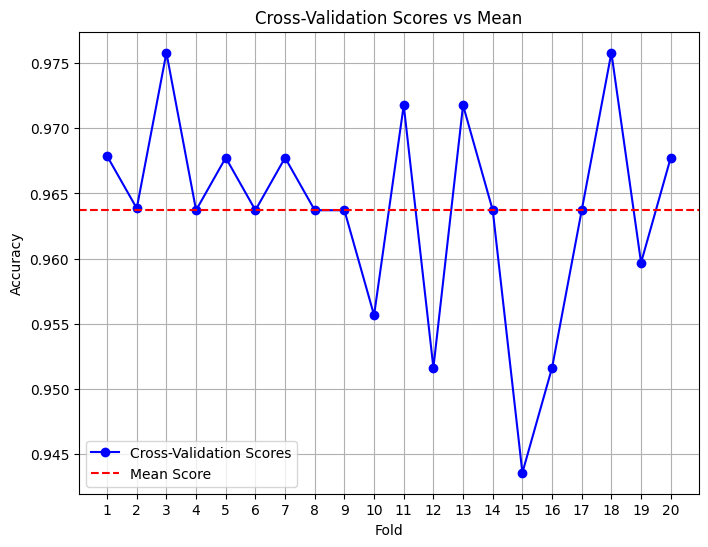

In [ ]:
mean_score = scores.mean()

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(scores) + 1), scores, marker='o', linestyle='-', color='b', label='Cross-Validation Scores')
plt.axhline(y=mean_score, color='r', linestyle='--', label='Mean Score')

plt.title('Cross-Validation Scores vs Mean')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.xticks(range(1, len(scores) + 1))
plt.legend()
plt.grid(True)

plt.show()

In [ ]:
tree_model = DecisionTreeClassifier(random_state=42)

tree_model.fit(X_train, y_train)

y_pred = tree_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Decision Tree model: {accuracy}")

Accuracy of Decision Tree model: 0.9697885196374623


In [ ]:
cv = StratifiedKFold(n_splits=20, shuffle=True, random_state=42)

scores = cross_val_score(tree_model, X, y, cv=cv, scoring='accuracy')

print("Cross-Validation Scores:", scores)
print("Average Accuracy:", scores.mean())
sd_scores = np.std(scores)
print(f"Standard Deviation of Cross-Validation Scores: {sd_scores:.4f}")

Cross-Validation Scores: [0.96787149 0.96385542 0.97580645 0.96370968 0.95967742 0.96370968
 0.96774194 0.9516129  0.95967742 0.94758065 0.96774194 0.93951613
 0.97177419 0.95564516 0.94354839 0.9516129  0.95967742 0.96774194
 0.9516129  0.96774194]
Average Accuracy: 0.9598927969944295
Standard Deviation of Cross-Validation Scores: 0.0095


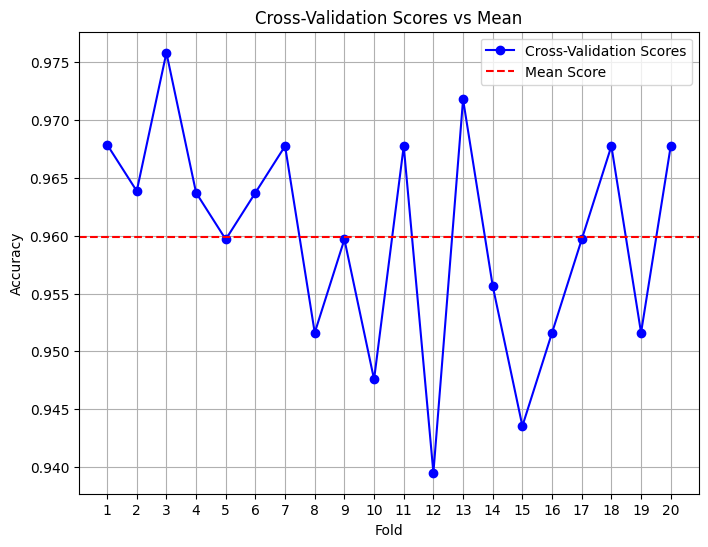

In [ ]:
mean_score = scores.mean()

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(scores) + 1), scores, marker='o', linestyle='-', color='b', label='Cross-Validation Scores')
plt.axhline(y=mean_score, color='r', linestyle='--', label='Mean Score')

plt.title('Cross-Validation Scores vs Mean')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.xticks(range(1, len(scores) + 1))
plt.legend()
plt.grid(True)

plt.show()

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Random Forest model: {accuracy}")

Accuracy of Random Forest model: 0.9697885196374623


In [ ]:
cv = StratifiedKFold(n_splits=20, shuffle=True, random_state=42)

scores = cross_val_score(rf_model, X, y, cv=cv, scoring='accuracy')

print("Cross-Validation Scores:", scores)
print("Average Accuracy:", scores.mean())
sd_scores = np.std(scores)
print(f"Standard Deviation of Cross-Validation Scores: {sd_scores:.4f}")

Cross-Validation Scores: [0.96787149 0.96385542 0.97580645 0.96370968 0.95967742 0.96370968
 0.96774194 0.9516129  0.95967742 0.94758065 0.96774194 0.93951613
 0.97177419 0.95564516 0.94354839 0.9516129  0.95967742 0.96774194
 0.9516129  0.96774194]
Average Accuracy: 0.9598927969944295
Standard Deviation of Cross-Validation Scores: 0.0095


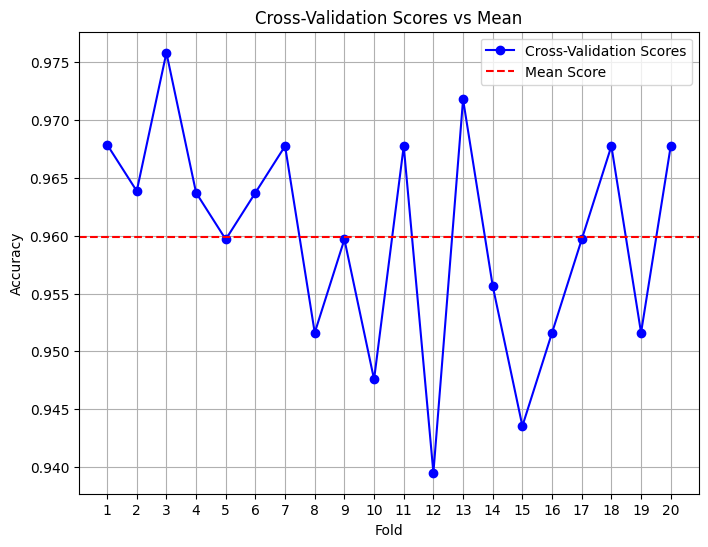

In [ ]:
mean_score = scores.mean()

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(scores) + 1), scores, marker='o', linestyle='-', color='b', label='Cross-Validation Scores')
plt.axhline(y=mean_score, color='r', linestyle='--', label='Mean Score')

plt.title('Cross-Validation Scores vs Mean')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.xticks(range(1, len(scores) + 1))
plt.legend()
plt.grid(True)

plt.show()

In [ ]:

models = [
    ('Logistic Regression', logreg_model),
    ('KNN', knn_model),
    ('Naive Bayes', nb_model),
    ('Linear SVM', linear_svm),
    ('Non-linear SVM', nonlinear_svm),
    ('Decision Tree', tree_model),
    ('Random Forest', rf_model),
]

results = []
cv = StratifiedKFold(n_splits=20, shuffle=True, random_state=42)

for model_name, model in models:
    scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')

    mean_score = scores.mean()
    sd_score = scores.std()

    model.fit(X, y)
    y_pred = model.predict(X)

    accuracy = accuracy_score(y, y_pred)

    results.append([model_name, accuracy, mean_score, sd_score])

results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Mean Val Score', 'SD Val Score'])

display(results_df)

Model  Accuracy  Mean Val Score  SD Val Score
0  Logistic Regression  0.964732        0.963522      0.007913
1                  KNN  0.964732        0.960700      0.011183
2          Naive Bayes  0.945183        0.944781      0.007550
3           Linear SVM  0.964732        0.963723      0.007966
4       Non-linear SVM  0.964732        0.963723      0.007966
5        Decision Tree  0.964732        0.959893      0.009506
6        Random Forest  0.964732        0.959893      0.009506

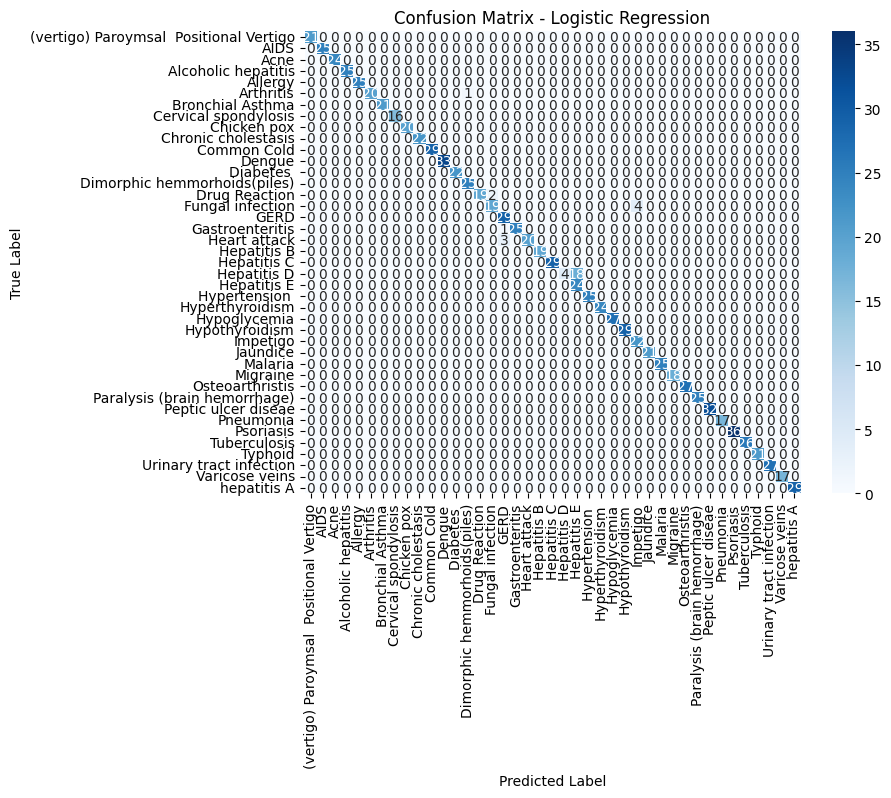

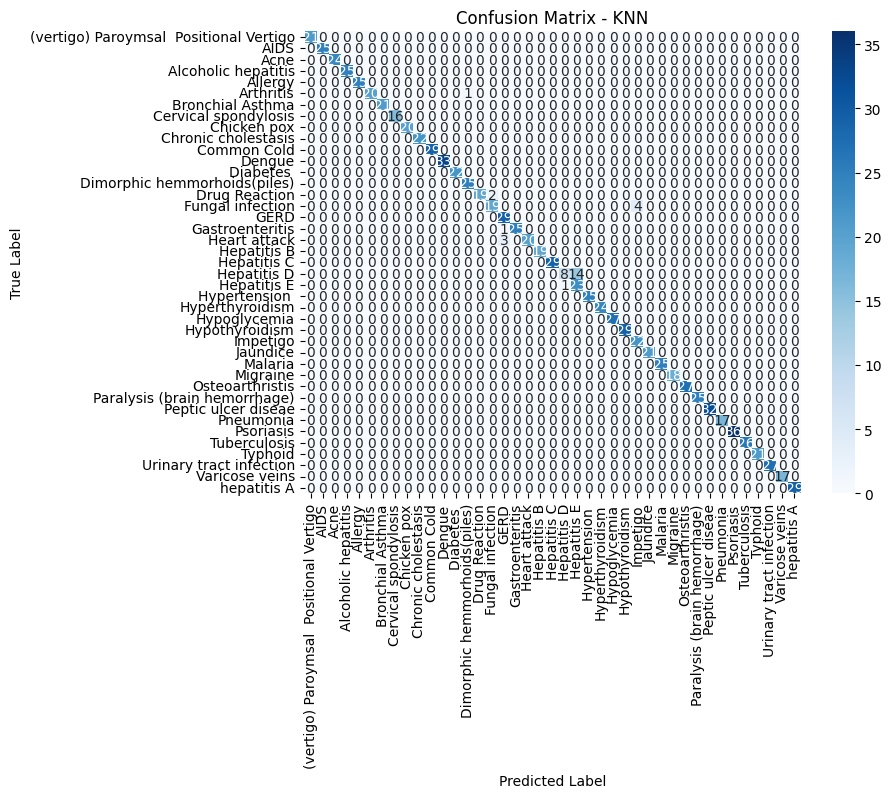

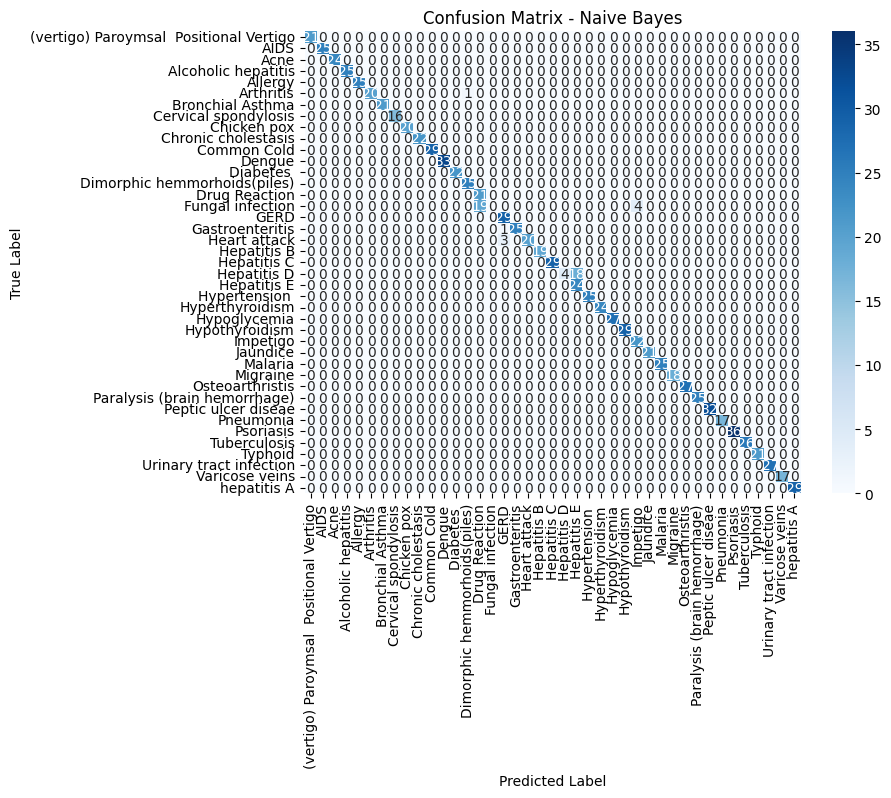

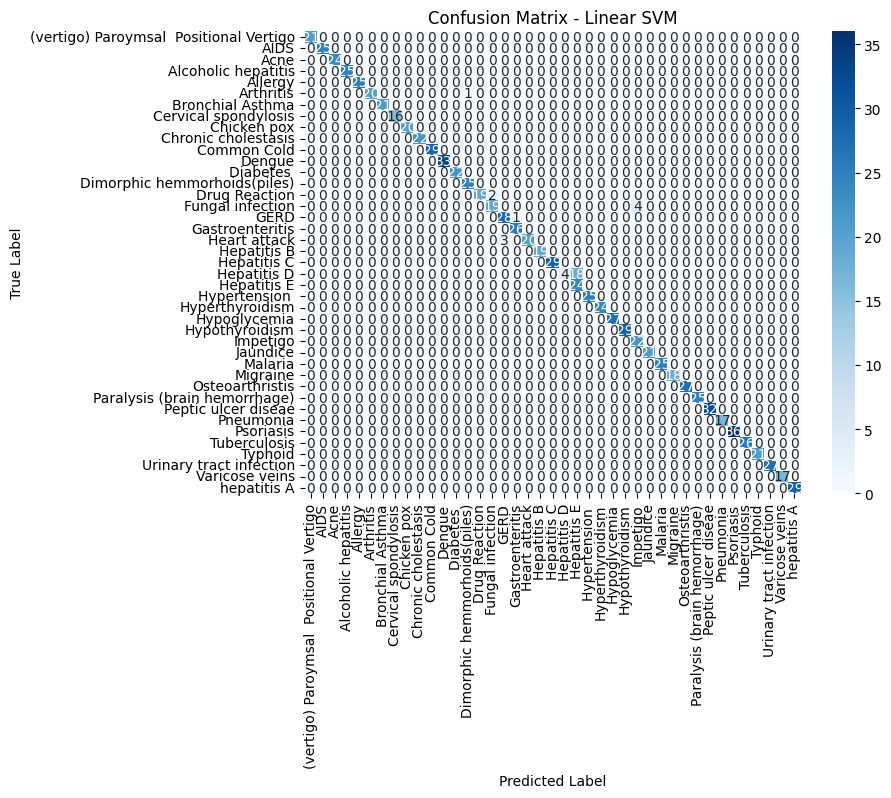

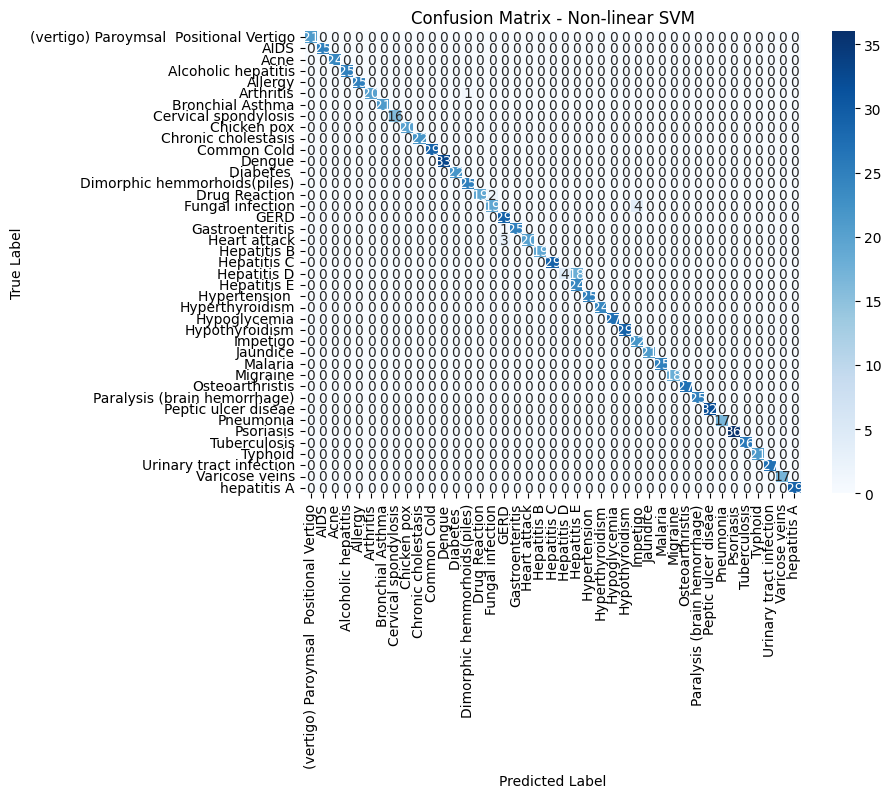

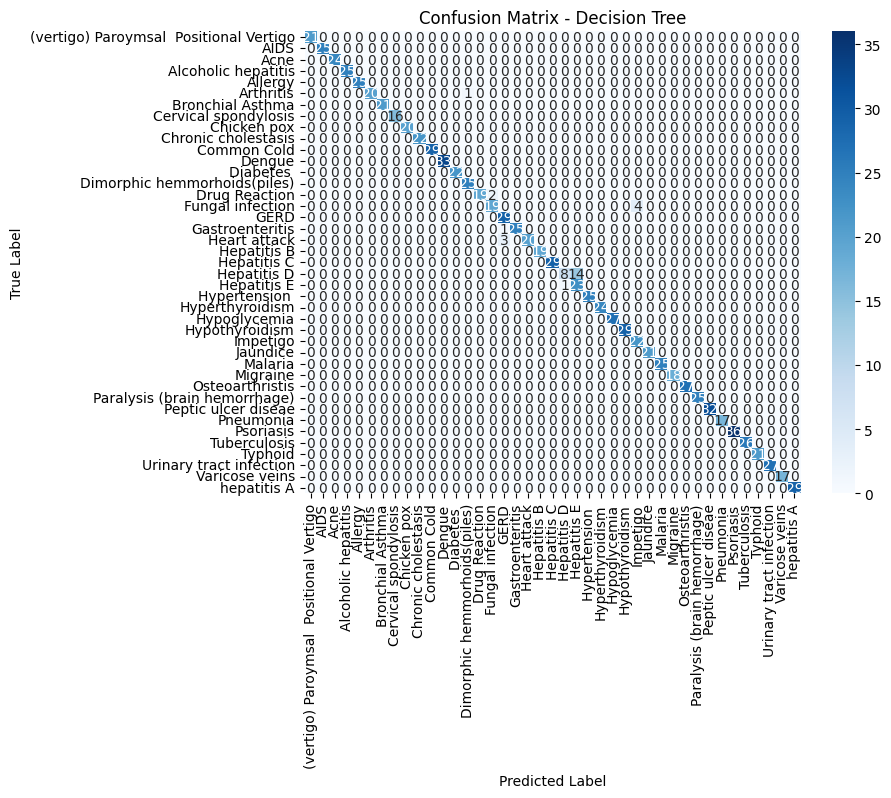

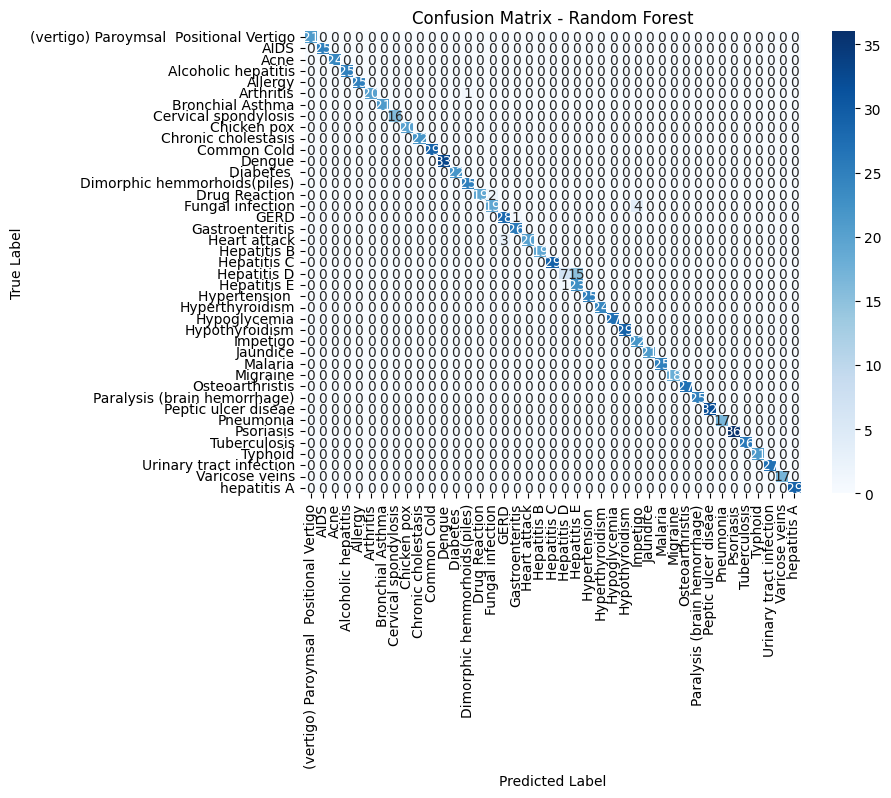

In [ ]:
for model_name, model in models:
    y_pred = model.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

In [ ]:
description_df = pd.read_csv("description.csv")
diets_df = pd.read_csv("diets.csv")
medications_df = pd.read_csv("medications.csv")
precautions_df = pd.read_csv("precautions_df.csv")
symptoms_df = pd.read_csv("symtoms_df.csv")
workouts_df = pd.read_csv("workout_df.csv")

def predict_disease(selected_symptoms):
    """Predicts the disease based on the given symptoms."""
    input_data = pd.DataFrame([[0] * len(filtered_data.columns[:-1])],
                             columns=filtered_data.columns[:-1])
    for symptom in selected_symptoms:
        input_data.loc[0, symptom] = 1
    prediction = nonlinear_svm.predict(input_data)[0]
    predicted_disease = le.inverse_transform([prediction])[0]
    return predicted_disease

def get_disease_info(disease):
    """Retrieves information for the selected disease."""
    description = description_df[description_df["Disease"] == disease]["Description"].values[0]
    diets = diets_df[diets_df["Disease"] == disease]["Diet"].values[0]
    medications = medications_df[medications_df["Disease"] == disease]["Medication"].values[0]
    precautions_row = precautions_df[precautions_df["Disease"] == disease]
    precautions = ", ".join(precautions_row[["Precaution_1", "Precaution_2", "Precaution_3", "Precaution_4"]].values[0].tolist())
    all_symptoms = symptoms_df[symptoms_df["Disease"] == disease][["Symptom_1", "Symptom_2", "Symptom_3", "Symptom_4"]].values.flatten()
    symptoms = ", ".join(list(set(filter(None, all_symptoms))))
    all_workouts = workouts_df[workouts_df["disease"] == disease]["workout"].values.flatten()
    workouts = ", ".join(list(set(filter(None, all_workouts))))
    return description, diets, medications, precautions, symptoms, workouts


symptom_columns = filtered_data.columns[:-1].tolist()

with gr.Blocks() as demo:
    with gr.Row():
        symptom_inputs = gr.CheckboxGroup(choices=symptom_columns, label="Select Symptoms")

    with gr.Row():
        prediction_output = gr.Textbox(label="Predicted Disease")
        description_output = gr.Textbox(label="Description")

    with gr.Row():
        diets_output = gr.Textbox(label="Diets")
        medications_output = gr.Textbox(label="Medications")

    with gr.Row():
        precautions_output = gr.Textbox(label="Precautions")
        symptoms_output = gr.Textbox(label="Symptoms")

    with gr.Row():
        workouts_output = gr.Textbox(label="Workouts")

    def predict_and_display_info(selected_symptoms):
        predicted_disease = predict_disease(selected_symptoms)
        description, diets, medications, precautions, symptoms, workouts = get_disease_info(predicted_disease)
        return predicted_disease, description, diets, medications, precautions, symptoms, workouts

    predict_button = gr.Button("Predict and Get Info")
    predict_button.click(
        predict_and_display_info,
        inputs=symptom_inputs,
        outputs=[prediction_output, description_output, diets_output, medications_output,
                 precautions_output, symptoms_output, workouts_output]
    )

demo.launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://48dcd3d4866a52006c.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
import gradio as gr

with gr.Blocks(theme=gr.themes.Glass(), title="Disease Prediction App") as demo:
    with gr.Column():
        with gr.Row():
            symptom_inputs = gr.CheckboxGroup(choices=symptom_columns, label="Select Symptoms")
        with gr.Row():
            prediction_output = gr.Textbox(label="Predicted Disease")
            description_output = gr.Textbox(label="Description")
        with gr.Row():
            diets_output = gr.Textbox(label="Diets")
            medications_output = gr.Textbox(label="Medications")
        with gr.Row():
            precautions_output = gr.Textbox(label="Precautions")
            symptoms_output = gr.Textbox(label="Symptoms")
        with gr.Row():
            workouts_output = gr.Textbox(label="Workouts")
        with gr.Row():  # Center the button
            predict_button = gr.Button("Predict and Get Info", variant="primary")

    gr.Markdown("<center>Created By Santanu</center>", elem_id="footer")

    def predict_and_display_info(selected_symptoms):
        predicted_disease = predict_disease(selected_symptoms)
        description, diets, medications, precautions, symptoms, workouts = get_disease_info(predicted_disease)
        return predicted_disease, description, diets, medications, precautions, symptoms, workouts

    predict_button.click(
        predict_and_display_info,
        inputs=symptom_inputs,
        outputs=[prediction_output, description_output, diets_output, medications_output,
                 precautions_output, symptoms_output, workouts_output]
    )

demo.launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://77c138336962d4fb75.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
